# Data Visualization HW #3 17011720 심소민

Due date: Nov 13 Fri

data: [Chicago Crimes - 2001 to present](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.display import display, HTML, Javascript
from string import Template
import pandas as pd
import numpy as np
import json, random
import IPython.display
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv')
df.shape

(7227300, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227300 entries, 0 to 7227299
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [74]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Felony,Vagueness,Misdemeanor,Worst
0,11034701,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,0,0,1,0
1,11227287,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,1,0,0,0
2,11227583,03/28/2017 02:00:00 PM,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,1,0,0,0
3,11227293,09/09/2017 08:17:00 PM,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,0,0,1,0
4,11227634,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,1,0,0,0


In [77]:
df[df['Arrest']==False].shape

(5261510, 15)

In [78]:
total=(5261510+1965790)

In [79]:
1965790/total

0.2719950742324243

In [80]:
5261510/total

0.7280049257675757

In [90]:
df[(df['Arrest']==False) & (df['Felony']==1)].shape[0]/5261510

0.13213051006270063

In [91]:
df[(df['Arrest']==False) & (df['Vagueness']==1)].shape[0]/5261510

0.0657917593998681

In [92]:
df[(df['Arrest']==False) & (df['Misdemeanor']==1)].shape[0]/5261510

0.8009879293206703

In [93]:
df[(df['Arrest']==True) & (df['Felony']==1)].shape[0]/1965790

0.40433464408711

In [94]:
df[(df['Arrest']==True) & (df['Vagueness']==1)].shape[0]/1965790

0.028409443531608156

In [95]:
df[(df['Arrest']==True) & (df['Misdemeanor']==1)].shape[0]/1965790

0.5646986707634081

## 변수 설명

- 'ID': 레코드의 고유 식별자
- 'Case Number': 사건에 고유 한 시카고 경찰서 RD 번호 (기록 부서 번호).
- 'Date': 사건이 발생한 날짜. 이것은 때때로 최선의 추정치입니다.
- 'Block': 사건이 발생한 부분적으로 수정 된 주소로 실제 주소와 동일한 블록에 배치됩니다.
- 'IUCR': 일리노이 Unifrom Crime Reporting 코드.
- 'Primary Type': IUCR 코드의 기본 설명
- 'Description': 기본 설명의 하위 범주 인 IUCR 코드의 보조 설명
- 'Location Dscription': 기본 설명의 하위 카테고리인 IUCR 코드의 보조 설명
- 'Arrest': 체포 여부
- 'Domestic': 가정과 관련된 것인지 여부
- 'Beat': 사건이 발생한 비트를 나타냅니다. 비트는 가장 작은 경찰 지리적 영역입니다. 각 비트에는 전용 경찰 비트 카가 있습니다. 3 ~ 5 개의 비트가 경찰 구역을 구성하고 3 개 구역이 경찰 구역을 구성합니다. 시카고 경찰국에는 22 개의 경찰 구역이 있습니다. https://data.cityofchicago.org/d/aerh-rz74에서 비트를 확인하세요.
- 'District': 사건이 발생한 경찰 구역 https://data.cityofchicago.org/d/fthy-xz3r에서 지구를 참조하십시오.
- 'Ward': 사건이 발생한 와드 (시의회 지구). https://data.cityofchicago.org/d/sp34-6z76에서 와드를 참조하십시오.
- 'Community Area': 사고가 발생한 커뮤니티 영역을 나타냅니다. 시카고에는 77 개의 커뮤니티 영역이 있습니다. https://data.cityofchicago.org/d/cauq-8yn6에서 커뮤니티 영역을 참조하십시오.
- 'FBI code': FBI의 NIBRS (National Incident-Based Reporting System)에 명시된 범죄 분류를 나타냅니다. http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html에서 이러한 분류의 시카고 경찰국 목록을 참조하십시오.
- 'X Coordinate': 일리노이 주 동부 NAD 1983 투영에서 사건이 발생한 위치의 x 좌표입니다. 이 위치는 부분 수정을 위해 실제 위치에서 이동되지만 동일한 블록에 속합니다.
- 'Y Coordinate': 일리노이 주 동부 NAD 1983 투영에서 사건이 발생한 위치의 y 좌표입니다. 이 위치는 부분 수정을 위해 실제 위치에서 이동되지만 동일한 블록에 속합니다.
- 'Year': 사건이 발생한 연도.
- 'Updated On': 레코드가 마지막으로 업데이트 된 날짜 및 시간입니다.
- 'Latitude': (위도)사건이 발생한 위치의 위도. 이 위치는 부분 수정을 위해 실제 위치에서 이동되지만 동일한 블록에 속합니다.
- 'Longitude': (경도)사고가 발생한 위치의 경도입니다. 이 위치는 부분 수정을 위해 실제 위치에서 이동되지만 동일한 블록에 속합니다.
- 'Location':이 데이터 포털에서지도 및 기타 지리적 작업을 생성 할 수있는 형식으로 사건이 발생한 위치입니다. 이 위치는 부분 수정을 위해 실제 위치에서 이동되지만 동일한 블록에 속합니다.

In [7]:
df['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT', 'BURGLARY', 'THEFT',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'NARCOTICS', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'BATTERY',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OBSCENITY', 'NON-CRIMINAL',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'PROSTITUTION',
       'INTIMIDATION', 'ARSON', 'INTERFERENCE WITH PUBLIC OFFICER',
       'GAMBLING', 'STALKING', 'KIDNAPPING', 'OTHER NARCOTIC VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'RITUALISM',
       'HUMAN TRAFFICKING', 'PUBLIC INDECENCY', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'],
      dtype=object)

경범죄와 중범죄 구분 기준
: 어떤 범주로 형벌이 가해지는지 [FindLaw](https://www.findlaw.com/), [FreeAdvice](https://www.freeadvice.com/)등 사이트를 참고하였다. 정도에 따라 달라지는 것은 rough하게 often/general한 경우로 취급하였다. 그 외의 언급이 없는 경우, 경계가 애매하므로 애매함 카테고리로 분류한다.

In [8]:
Felony = ['CRIMINAL SEXUAL ASSAULT', 'BURGLARY', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'NARCOTICS', 
          'ROBBERY', 'ARSON', 'KIDNAPPING', 'HUMAN TRAFFICKING']
Vagueness = ['OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'GAMBLING', 'STALKING', 'OTHER NARCOTIC VIOLATION', 
             'CONCEALED CARRY LICENSE VIOLATION', 'RITUALISM']
Misdemeanor = ['DECEPTIVE PRACTICE', 'THEFT', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'BATTERY', 'ASSAULT', 'CRIMINAL TRESPASS', 
               'WEAPONS VIOLATION', 'OBSCENITY', 'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'NON-CRIMINAL', 
               'PUBLIC PEACE VIOLATION', 'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC INDECENCY', 
               'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE']
HOMICIDE = ['HOMICIDE']

In [10]:
len(Felony)+len(Vagueness)+len(Misdemeanor)+len(HOMICIDE)==len(df['Primary Type'].unique())

True

In [11]:
df['Felony'] = 0
df.loc[df['Primary Type'].isin(Felony),'Felony'] = 1
df['Vagueness'] = 0
df.loc[df['Primary Type'].isin(Vagueness),'Vagueness'] = 1
df['Misdemeanor'] = 0
df.loc[df['Primary Type'].isin(Misdemeanor),'Misdemeanor'] = 1
df['Worst'] = 0
df.loc[df['Primary Type'].isin(HOMICIDE),'Worst'] = 1

In [ ]:
df.head()

In [12]:
df.drop(['Case Number', 'Block', 'IUCR', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'], inplace=True, axis=1)

In [13]:
crimes = df.copy()

In [14]:
crimes.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Felony,Vagueness,Misdemeanor,Worst
0,11034701,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,0,0,1,0
1,11227287,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,1,0,0,0
2,11227583,03/28/2017 02:00:00 PM,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,1,0,0,0


In [15]:
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [16]:
crimes.shape

(7227300, 15)

In [17]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7227300 entries, 2001-01-01 11:00:00 to 2019-05-26 02:11:00
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Community Area        float64       
 11  Felony                int64         
 12  Vagueness             int64         
 13  Misdemeanor           int64         
 14  Worst                 int64         
dtypes: bool(2), datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 785.7+ MB


In [18]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

In [19]:
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

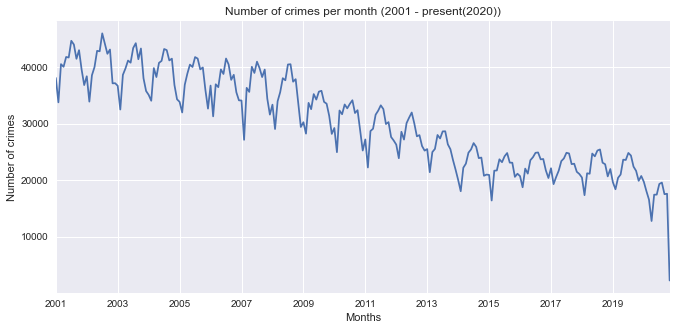

In [20]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - present(2020))')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [98]:
crimes[crimes['Felony']==1].resample('M').size().rolling(365).sum()

KeyboardInterrupt: 

In [ ]:
crimes[crimes['Misdemeanor']==1].resample('Y').size().rolling(365).sum()

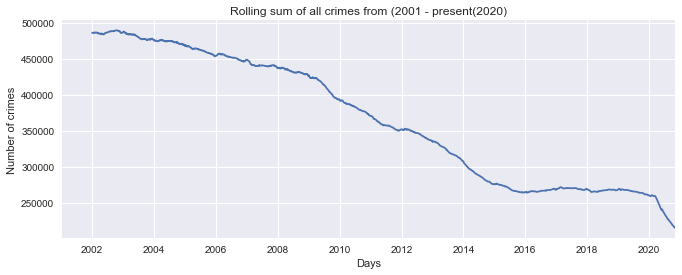

In [21]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from (2001 - present(2020)')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

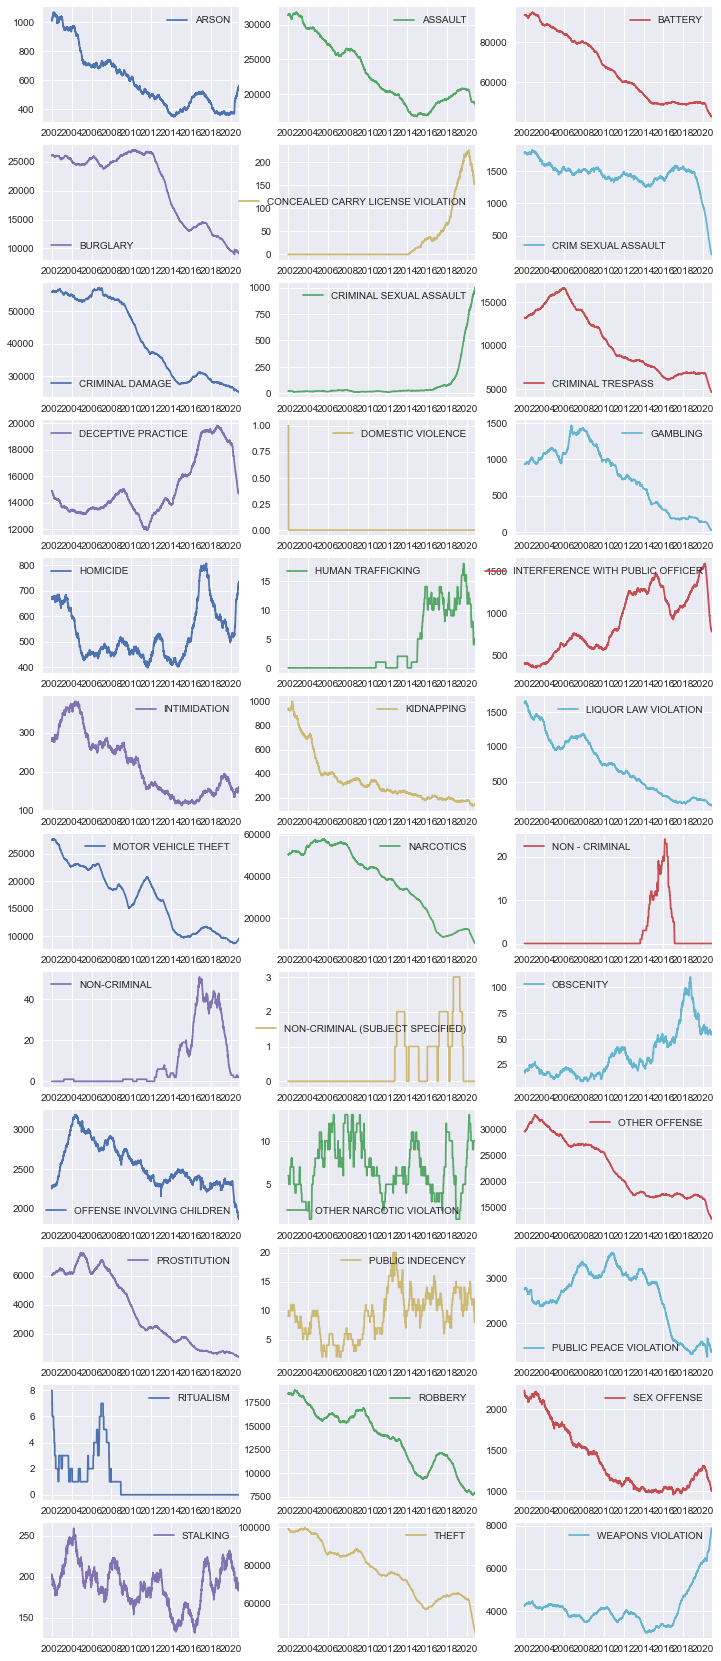

In [22]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

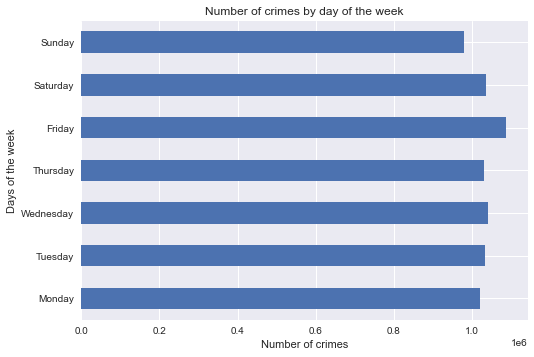

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

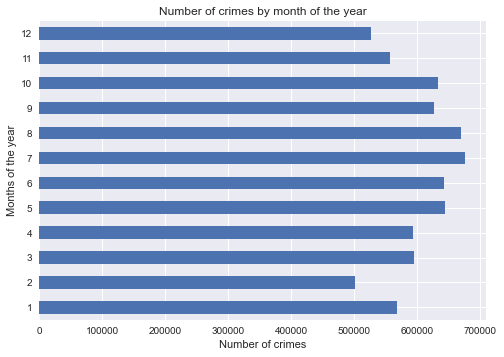

In [24]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

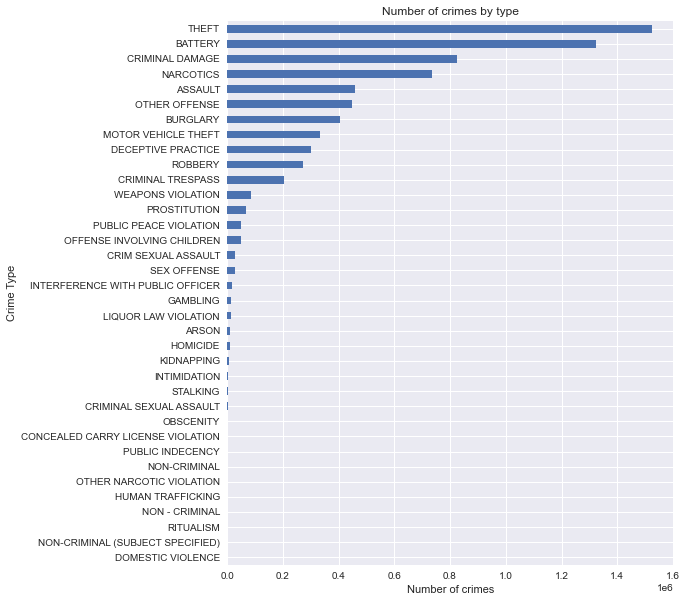

In [25]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

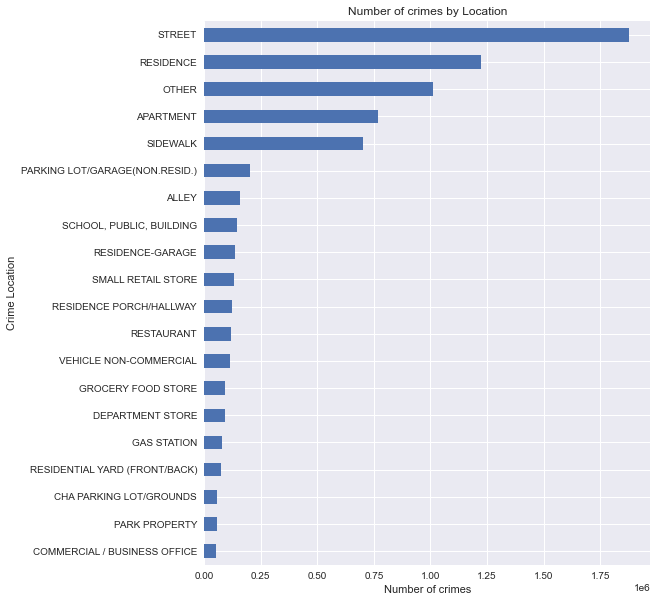

In [26]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [28]:
crimes=crimes.sort_index(ascending=True)

In [29]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Felony,Vagueness,Misdemeanor,Worst
Date,,,,,,,,,,,,,,,
2001-01-01,1651806,2001-01-01,THEFT,OTHER,RESIDENCE,False,False,1932,19.0,NaN,NaN,0,0,1,0
2001-01-01,1353509,2001-01-01,DECEPTIVE PRACTICE,OTHER,RESIDENCE,False,False,1123,11.0,NaN,NaN,0,0,1,0
2001-01-01,3361926,2001-01-01,OFFENSE INVOLVING CHILDREN,OTHER,RESIDENCE,False,False,2012,20.0,40.0,77.0,0,1,0,0
2001-01-01,3661792,2001-01-01,THEFT,OTHER,RESIDENCE,False,False,2131,2.0,5.0,41.0,0,0,1,0
2001-01-01,1370284,2001-01-01,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,1512,15.0,NaN,NaN,0,0,1,0


In [99]:
crimes['sum_m'] = ((crimes['Arrest']==False) & (crimes['Misdemeanor']==1)).cumsum()
crimes['sum_tf'] = crimes['Felony'].cumsum()/(crimes['sum_m'])
crimes['sum_f'] = ((crimes['Arrest']==False) & (crimes['Felony']==1)).cumsum()
crimes['sum_th'] = crimes['Worst'].cumsum()/(crimes['sum_f'])

In [100]:
crimes

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Felony,Vagueness,Misdemeanor,Worst,sum_m,sum_tf,sum_f,sum_th
Date,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,1651806,2001-01-01 00:00:00,THEFT,OTHER,RESIDENCE,False,False,1932,19.0,NaN,NaN,0,0,1,0,1,0.000000,0,NaN
2001-01-01 00:00:00,1353509,2001-01-01 00:00:00,DECEPTIVE PRACTICE,OTHER,RESIDENCE,False,False,1123,11.0,NaN,NaN,0,0,1,0,2,0.000000,0,NaN
2001-01-01 00:00:00,3361926,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,OTHER,RESIDENCE,False,False,2012,20.0,40.0,77.0,0,1,0,0,2,0.000000,0,NaN
2001-01-01 00:00:00,3661792,2001-01-01 00:00:00,THEFT,OTHER,RESIDENCE,False,False,2131,2.0,5.0,41.0,0,0,1,0,3,0.000000,0,NaN
2001-01-01 00:00:00,1370284,2001-01-01 00:00:00,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,1512,15.0,NaN,NaN,0,0,1,0,4,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04 23:45:00,12212454,2020-11-04 23:45:00,DECEPTIVE PRACTICE,OTHER,STREET,False,False,131,1.0,3.0,33.0,0,0,1,0,4214405,0.353559,695206,0.015424
2020-11-04 23:49:00,12212459,2020-11-04 23:49:00,CRIMINAL TRESPASS,OTHER,RESIDENCE,True,False,621,6.0,6.0,69.0,0,0,1,0,4214405,0.353559,695206,0.015424
2020-11-04 23:51:00,12212436,2020-11-04 23:51:00,BATTERY,OTHER,STREET,False,False,1113,11.0,28.0,26.0,0,0,1,0,4214406,0.353559,695206,0.015424


In [101]:
crimes_df=crimes[crimes['sum_m']%100==0]

In [102]:
crimes_df=crimes_df.groupby(level=0).first()
crimes_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Felony,Vagueness,Misdemeanor,Worst,sum_m,sum_tf,sum_f,sum_th
Date,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,2893567,2001-01-01 00:00:00,THEFT,OTHER,RESIDENCE,False,False,2222,22.0,21.0,71.0,0,0,1,0,100,0.520000,50,0.000000
2001-01-01 00:26:26,1314562,2001-01-01 00:26:26,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,631,6.0,NaN,NaN,0,0,1,0,200,0.390000,69,0.000000
2001-01-01 02:00:00,1311976,2001-01-01 02:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,912,9.0,NaN,NaN,0,0,1,0,300,0.306667,78,0.000000
2001-01-01 04:08:25,1310268,2001-01-01 04:08:25,BATTERY,SIMPLE,RESIDENCE,False,False,533,5.0,NaN,NaN,0,0,1,0,400,0.280000,90,0.000000
2001-01-01 08:00:00,1312734,2001-01-01 08:00:00,THEFT,OVER $500,STREET,False,False,832,8.0,NaN,NaN,0,0,1,0,500,0.252000,100,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04 09:29:00,12211676,2020-11-04 09:29:00,NARCOTICS,OTHER,SIDEWALK,True,False,1112,11.0,27.0,23.0,1,0,0,0,4214100,0.353573,695167,0.015422
2020-11-04 14:00:00,12213082,2020-11-04 14:00:00,DECEPTIVE PRACTICE,OTHER,APARTMENT,False,False,334,3.0,7.0,43.0,0,0,1,0,4214200,0.353567,695174,0.015423
2020-11-04 18:15:00,12214232,2020-11-04 18:15:00,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,2512,25.0,36.0,18.0,0,0,1,0,4214300,0.353561,695183,0.015425


In [52]:
rate_fm = crimes['sum_tf'].resample('M').last()/crimes['sum_m'].resample('M').last()

In [53]:
rate_hm = crimes['sum_th'].resample('M').last()/crimes['sum_f'].resample('M').last()

In [82]:
rate_fm.values *100

array([41.90140845, 41.71076065, 40.27691907, 38.54781722, 37.43126545,
       36.82058646, 36.26977361, 36.13426165, 36.01817989, 36.19230936,
       36.59841336, 37.05843937, 37.47931332, 37.83722985, 37.90789719,
       37.82584941, 37.61591322, 37.30132467, 36.98786066, 36.88882968,
       36.7102401 , 36.61568104, 36.7677024 , 36.97860065, 37.20084071,
       37.32744698, 37.28205052, 37.19885726, 37.15193936, 37.04397832,
       36.88629968, 36.87146472, 36.95459788, 37.14868283, 37.26934445,
       37.3318527 , 37.48937373, 37.64010174, 37.6596965 , 37.68927245,
       37.65532215, 37.56509533, 37.51655376, 37.50420627, 37.56083198,
       37.59177242, 37.68950484, 37.79659349, 37.9285683 , 38.04436911,
       38.11957637, 38.14004365, 38.13823036, 38.133196  , 38.12731857,
       38.16399589, 38.21637046, 38.25093918, 38.32317434, 38.4345321 ,
       38.49188264, 38.53682605, 38.5394735 , 38.5355727 , 38.55466826,
       38.55161353, 38.5316074 , 38.54302924, 38.56917399, 38.59

In [83]:
len(rate_fm)

239

In [81]:
rate_hm.values *100

array([1.23239437, 1.09872611, 1.10210023, 1.27560881, 1.25173853,
       1.36444532, 1.44195519, 1.42981086, 1.46492372, 1.47871347,
       1.48822425, 1.47126944, 1.45350618, 1.43698696, 1.43117261,
       1.42349366, 1.42452448, 1.44187535, 1.45022883, 1.46677243,
       1.47375119, 1.46914789, 1.44840491, 1.46288644, 1.45089523,
       1.44304924, 1.44718669, 1.45487281, 1.46009965, 1.45806044,
       1.46768817, 1.45702615, 1.45199292, 1.44718257, 1.44627307,
       1.43959022, 1.42793559, 1.42593441, 1.4243639 , 1.41470997,
       1.40452256, 1.40228443, 1.40104744, 1.40149111, 1.39018173,
       1.3798397 , 1.37006259, 1.36003928, 1.34799933, 1.34282425,
       1.34118185, 1.33742929, 1.3358207 , 1.33591721, 1.33823515,
       1.33729128, 1.32705791, 1.32164673, 1.31245877, 1.30560928,
       1.29904885, 1.29140706, 1.28975757, 1.28861368, 1.28645677,
       1.28706122, 1.29403187, 1.28774386, 1.29259599, 1.28941255,
       1.28927998, 1.28443284, 1.27863816, 1.27642116, 1.27765

In [57]:
time = rate_fm.index

In [58]:
time

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', name='Date', length=239, freq='M')

In [63]:
YM = time.map(lambda x: 100*x.year + x.month)
rate_fm.index = YM

In [69]:
np.mean(rate_fm)

0.38142356514996567

In [66]:
rate_fm.to_csv("rate_fm.csv")

In [ ]:
crimes['sum_m'].resample('M').first()

In [ ]:
df[(df['Arrest']==False) & (df['Latitude'] is NaN)]

In [ ]:
len((df['Latitude'].dropna()))

In [ ]:
print('Dataset Shape before drop_duplicate : ', df.shape)
df.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', df.shape)

In [ ]:
df.head()

Illinois Uniform Crime Reporting (IUCR) code

In [ ]:
df[9:].head()

In [ ]:
data = ["DOMESTIC VIOLENCE", "NON-CRIMINAL", "RITUALISM",
"NON - CRIMINAL", "HUMAN TRAFFICKING", "OTHER NARCOTIC VIOLATION", "NON-CRIMINAL", "PUBLIC INDECENCY",
"CONCEALED CARRY LICENSE VIOLATION", "OBSCENITY", "CRIMINAL SEXUAL ASSAULT", "STALKING", "INTIMIDATION",
"KIDNAPPING", "HOMICIDE", "ARSON", "LIQUOR LAW VIOLATION", "GAMBLING", "INTERFERENCE WITH PUBLIC OFFICER",
"SEX OFFENSE", "CRIM SEXUAL ASSAULT", "OFFENSE INVOLVING CHILDREN", "PUBLIC PEACE VIOLATION", "PROSTITUTION",
"WEAPONS VIOLATION", "CRIMINAL TRESPASS", "ROBBERY", "DECEPTIVE PRACTICE", "MOTOR VEHICLE THEFT", "BURGLARY",
"OTHER OFFENSE", "ASSAULT", "NARCOTICS", "CRIMINAL DAMAGE", "BATTERY", "THEFT"]
c_data = [0, 2.197224577, 3.135494216, 3.63758616, 4.219507705, 4.927253685, 5.153291594,
  5.209486153, 6.472346295, 6.539585956, 7.682021511, 8.24143969, 8.358900612, 8.848939995, 9.279586545,
   9.398395461, 9.57824206, 9.588160179, 9.765603845, 10.22466484, 10.24341809, 10.82009823, 10.83318797,
   11.14712328, 11.34573683, 12.22922749, 12.51158481, 12.60808848, 12.7148131, 12.9159909, 13.01327369,
   13.03308616, 13.50703649, 13.62061427, 14.0958583, 14.23744005]

In [ ]:
len(data)

In [ ]:
a =[1,3,4,5]

In [ ]:
a[0]

In [ ]:
data[0]

In [ ]:
data2=[]
i=0
for i in range(len(data)):
    print(i)
    data2.append(data[35-i])

In [ ]:
a = crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=False)

In [ ]:
a.values

In [ ]:
c_data = [0, 2.197224577, 3.135494216, 3.63758616, 4.219507705, 4.927253685, 5.153291594,
  5.209486153, 6.472346295, 6.539585956, 7.682021511, 8.24143969, 8.358900612, 8.848939995, 9.279586545,
   9.398395461, 9.57824206, 9.588160179, 9.765603845, 10.22466484, 10.24341809, 10.82009823, 10.83318797,
   11.14712328, 11.34573683, 12.22922749, 12.51158481, 12.60808848, 12.7148131, 12.9159909, 13.01327369,
   13.03308616, 13.50703649, 13.62061427, 14.0958583, 14.23744005]

In [ ]:
data2=[]
i=0
for i in range(len(c_data)):
    print(i)
    data2.append(c_data[35-i])

In [ ]:
df_m['cumsum'] = (df.Misdemeanor == 1).cumsum()

In [ ]:
data2